In [4]:
import cv2
import yt_dlp
import numpy as np
import time
import matplotlib.pyplot as plt
import subprocess

In [23]:
urls = ["https://www.youtube.com/watch?v=nzzBwdxfpqo", "https://www.youtube.com/live/HsLvnFQW_yM?si=eltOk2O69icwtRF1"]

In [24]:
ydl_opts = {'format': 'best[ext=mp4]', 'quiet': True,} #best video quality, mp4 file, suppress console output
ydl = yt_dlp.YoutubeDL(ydl_opts)

In [25]:
url = urls[0]

info_dict = ydl.extract_info(url, download=False)
video_url = info_dict.get("url")

# Getting frames from stream directly (less acurate)

In [ ]:
count = 0
frames = []

while count < 10:
    start_time = time.time()
    
    capture = cv2.VideoCapture(video_url)
    ret, frame = capture.read()
    frames.append(frame)
    
    count += 1
    
    elapsed_time = time.time() - start_time
    remaining_time = max(0, 1 - elapsed_time)
    print(remaining_time)
    time.sleep(remaining_time)

In [ ]:
frames = np.stack(frames, axis=0)

In [ ]:
capture.release()
cv2.destroyAllWindows()

# Recording 10 seconds from stream and the extracting frames

In [30]:
subprocess.run([
    'ffmpeg',
    '-y',
    '-i', video_url,
    '-t', '10',  # Set duration to 10 seconds
    'output.mp4'
])


CompletedProcess(args=['ffmpeg', '-y', '-i', 'https://manifest.googlevideo.com/api/manifest/hls_playlist/expire/1700163789/ei/bRxWZavpH8XB6dsPlJCIGA/ip/91.132.40.20/id/nzzBwdxfpqo.1/itag/96/source/yt_live_broadcast/requiressl/yes/ratebypass/yes/live/1/sgoap/gir%3Dyes%3Bitag%3D140/sgovp/gir%3Dyes%3Bitag%3D137/rqh/1/hls_chunk_host/rr3---sn-5hne6nsk.googlevideo.com/xpc/EgVo2aDSNQ%3D%3D/playlist_duration/30/manifest_duration/30/spc/UWF9f8gpgu-Vm8pr9GhzBi3WFYTuDws/vprv/1/playlist_type/DVR/initcwndbps/1881250/mh/Le/mm/44/mn/sn-5hne6nsk/ms/lva/mv/m/mvi/3/pl/22/dover/11/pacing/0/keepalive/yes/fexp/24007246/beids/24350018/mt/1700142048/sparams/expire,ei,ip,id,itag,source,requiressl,ratebypass,live,sgoap,sgovp,rqh,xpc,playlist_duration,manifest_duration,spc,vprv,playlist_type/sig/ANLwegAwRgIhAIk4zhKzkpU90CUpEAuBdZ1ho64hDFRtkGMB4jX6DP9rAiEAvjB4pjR1g9dba-Zr6ix9zP1vaOgFK8UUkuhyLYFtxRY%3D/lsparams/hls_chunk_host,initcwndbps,mh,mm,mn,ms,mv,mvi,pl/lsig/AM8Gb2swRQIhAJp7LZx_WgXaY2qnn8inwt_Z41oELBbysShOK

ffmpeg -i '.\Brooks Falls - Katmai National Park - Part 043.mkv' -ss 00:31:57 -to 00:32:07 -vf fps=02 brooks_falls_katmai_national_park_part_043/2_frames_per_second/medium_movement_close_range/output_%04d.png

In [28]:
subprocess.run([
    'ffmpeg',
    '-y',
    '-i', 'output.mp4',
    '-vf', 'fps=01',  # Set duration to 10 seconds
    'output_%04d.png'
])

CompletedProcess(args=['ffmpeg', '-y', '-i', 'output.mp4', '-vf', 'fps=01', 'output_%04d.png'], returncode=0)

# Untested code

In [8]:
cap = cv2.VideoCapture(video_url)

In [9]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 30)

True

In [10]:
count = 0
frames = []

while count < 10:
    start_time = time.time()
    
    ret, frame = cap.read()
    frames.append(frame)
    
    count += 1
    
    elapsed_time = time.time() - start_time
    remaining_time = max(0, 1 - elapsed_time)
    print(remaining_time)
    time.sleep(remaining_time)

0.9600009918212891
0.9879922866821289
0.9959874153137207
0.9839558601379395
0.9919848442077637
0.9889850616455078
0.9788968563079834
0.9948289394378662
0.9959859848022461
0.9854075908660889


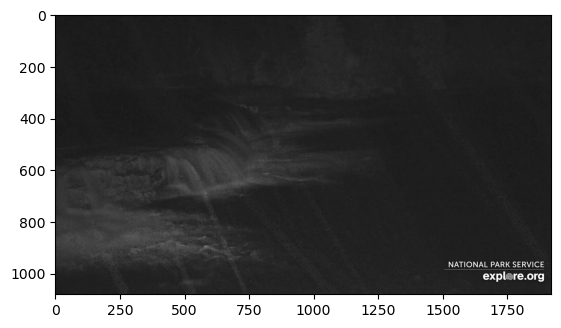

In [20]:
plt.imshow(frames[9])